# Flights dataset

https://www.kaggle.com/code/miquar/explore-flights-csv-airports-csv-airlines-csv/data?select=airlines.csv

In [1]:
import polars as pl
import numpy as np
from datetime import datetime, timedelta
import os

In [2]:
os.listdir('data')

['airlines.csv', 'flights.csv', 'airports.csv']

In [3]:
airlines_lazy_df = pl.scan_csv(os.path.join('data', 'airlines.csv'))
airlines_df = airlines_lazy_df.collect()
airlines_df.shape

(14, 2)

In [4]:
airlines_df.sample(5)

IATA_CODE,AIRLINE
str,str
"""MQ""","""American Eagle…"
"""EV""","""Atlantic South…"
"""B6""","""JetBlue Airway…"
"""DL""","""Delta Air Line…"
"""AS""","""Alaska Airline…"


In [5]:
airlines_df.columns

['IATA_CODE', 'AIRLINE']

In [6]:
airlines_df.get_column('AIRLINE').to_list()

['United Air Lines Inc.',
 'American Airlines Inc.',
 'US Airways Inc.',
 'Frontier Airlines Inc.',
 'JetBlue Airways',
 'Skywest Airlines Inc.',
 'Alaska Airlines Inc.',
 'Spirit Air Lines',
 'Southwest Airlines Co.',
 'Delta Air Lines Inc.',
 'Atlantic Southeast Airlines',
 'Hawaiian Airlines Inc.',
 'American Eagle Airlines Inc.',
 'Virgin America']

In [7]:
list(airlines_df.select('AIRLINE')[:, 0])

['United Air Lines Inc.',
 'American Airlines Inc.',
 'US Airways Inc.',
 'Frontier Airlines Inc.',
 'JetBlue Airways',
 'Skywest Airlines Inc.',
 'Alaska Airlines Inc.',
 'Spirit Air Lines',
 'Southwest Airlines Co.',
 'Delta Air Lines Inc.',
 'Atlantic Southeast Airlines',
 'Hawaiian Airlines Inc.',
 'American Eagle Airlines Inc.',
 'Virgin America']

In [8]:
airports_lazy_df = pl.scan_csv(os.path.join('data', 'airports.csv'))
airports_df = airports_lazy_df.collect()
airports_df.shape

(322, 7)

In [46]:
airports_df.head()

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447


In [47]:
airports_df.filter(pl.col('IATA_CODE') == "GST")

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""GST""","""Gustavus Airpo…","""Gustavus""","""AK""","""USA""",58.42438,-135.70738


In [49]:
airports_df.filter(pl.col('IATA_CODE').is_in(["GST", "ADK"]))

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ADK""","""Adak Airport""","""Adak""","""AK""","""USA""",51.87796,-176.64603
"""GST""","""Gustavus Airpo…","""Gustavus""","""AK""","""USA""",58.42438,-135.70738


In [10]:
airports_df.unique(subset='STATE')

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""GCK""","""Garden City Re…","""Garden City""","""KS""","""USA""",37.92752,-100.72441
"""BMI""","""Central Illino…","""Bloomington""","""IL""","""USA""",40.47799,-88.91595
"""HNL""","""Honolulu Inter…","""Honolulu""","""HI""","""USA""",21.31869,-157.92241
"""EUG""","""Eugene Airport…","""Eugene""","""OR""","""USA""",44.12326,-123.21869
"""BIL""","""Billings Logan…","""Billings""","""MT""","""USA""",45.80766,-108.54286
"""PPG""","""Pago Pago Inte…","""Pago Pago""","""AS""","""USA""",14.33102,-170.71053
"""COD""","""Yellowstone Re…","""Cody""","""WY""","""USA""",44.52019,-109.0238
"""COU""","""Columbia Regio…","""Columbia""","""MO""","""USA""",38.81809,-92.21963
"""BJI""","""Bemidji Region…","""Bemidji""","""MN""","""USA""",47.50942,-94.93372


In [11]:
flights_lazy_df = pl.scan_csv(os.path.join('data', 'flights.csv'))
flights_df = flights_lazy_df.head().collect()
flights_df.shape

(5, 31)

In [12]:
flights_df.columns

['YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [13]:
flights_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null


In [14]:
import pandas as pd

In [16]:
df = pd.read_csv(os.path.join('data', 'flights.csv'))

/tmp/ipykernel_6541/3701127378.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join('data', 'flights.csv'))


In [15]:
flights_lazy_df = pl.scan_csv(os.path.join('data', 'flights.csv'))
flights_df = flights_lazy_df.collect()
flights_df.shape

(5819079, 31)

In [16]:
!head -n 2 data/flights.csv

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,,,,,,


In [17]:
flights_df.write_parquet('flights.parquet', compression='zstd')

In [18]:
flights_lazy_df = pl.scan_parquet('flights.parquet')
flights_df = flights_lazy_df.select('ARRIVAL_TIME').collect()
flights_df.shape

(5819079, 1)

In [19]:
pl.scan_parquet('flights.parquet').schema

OrderedDict([('YEAR', Int64),
             ('MONTH', Int64),
             ('DAY', Int64),
             ('DAY_OF_WEEK', Int64),
             ('AIRLINE', Utf8),
             ('FLIGHT_NUMBER', Int64),
             ('TAIL_NUMBER', Utf8),
             ('ORIGIN_AIRPORT', Utf8),
             ('DESTINATION_AIRPORT', Utf8),
             ('SCHEDULED_DEPARTURE', Int64),
             ('DEPARTURE_TIME', Int64),
             ('DEPARTURE_DELAY', Int64),
             ('TAXI_OUT', Int64),
             ('WHEELS_OFF', Int64),
             ('SCHEDULED_TIME', Int64),
             ('ELAPSED_TIME', Int64),
             ('AIR_TIME', Int64),
             ('DISTANCE', Int64),
             ('WHEELS_ON', Int64),
             ('TAXI_IN', Int64),
             ('SCHEDULED_ARRIVAL', Int64),
             ('ARRIVAL_TIME', Int64),
             ('ARRIVAL_DELAY', Int64),
             ('DIVERTED', Int64),
             ('CANCELLED', Int64),
             ('CANCELLATION_REASON', Utf8),
             ('AIR_SYSTEM_DELAY', Int64)

In [20]:
flights_lazy_df = pl.scan_parquet('flights.parquet')
flights_df = flights_lazy_df.collect()
flights_df.shape

(5819079, 31)

In [21]:
flights_airports = set(list(flights_df.unique(subset=["ORIGIN_AIRPORT"]).select('ORIGIN_AIRPORT')[:, 0]))

In [22]:
airports_iata_codes = set(list(airports_df.unique(subset=["IATA_CODE"]).select('IATA_CODE')[:, 0]))

In [23]:
flights_airports == airports_iata_codes

False

In [24]:
len(flights_airports.intersection(airports_iata_codes))

322

In [25]:
flights_airports.difference(airports_iata_codes)

{'10135',
 '10136',
 '10140',
 '10141',
 '10146',
 '10154',
 '10155',
 '10157',
 '10158',
 '10165',
 '10170',
 '10185',
 '10208',
 '10257',
 '10268',
 '10279',
 '10299',
 '10333',
 '10372',
 '10397',
 '10408',
 '10423',
 '10431',
 '10434',
 '10469',
 '10529',
 '10551',
 '10561',
 '10577',
 '10581',
 '10599',
 '10620',
 '10627',
 '10631',
 '10685',
 '10693',
 '10713',
 '10721',
 '10728',
 '10731',
 '10732',
 '10739',
 '10747',
 '10754',
 '10779',
 '10781',
 '10785',
 '10792',
 '10800',
 '10821',
 '10849',
 '10868',
 '10874',
 '10918',
 '10926',
 '10980',
 '10990',
 '10994',
 '11003',
 '11013',
 '11042',
 '11049',
 '11057',
 '11066',
 '11067',
 '11076',
 '11097',
 '11109',
 '11111',
 '11122',
 '11140',
 '11146',
 '11150',
 '11193',
 '11203',
 '11252',
 '11259',
 '11267',
 '11274',
 '11278',
 '11292',
 '11298',
 '11308',
 '11315',
 '11337',
 '11413',
 '11423',
 '11433',
 '11447',
 '11471',
 '11481',
 '11503',
 '11525',
 '11537',
 '11540',
 '11577',
 '11587',
 '11603',
 '11612',
 '11617',


In [26]:
flights_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null


In [27]:
airports_df.head()

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447


In [51]:
flight_df = (flights_df.join(
    airports_df.select(['IATA_CODE', 'LATITUDE', 'LONGITUDE', 'STATE']).rename({
        "STATE": "ORIGIN_STATE",
        "LATITUDE":
        "ORIGIN_LATITUDE",
        "LONGITUDE":
        "ORIGIN_LONGITUDE"
    }),
    left_on='ORIGIN_AIRPORT',
    right_on='IATA_CODE')
             .join(airports_df.select(
        ['IATA_CODE', 'LATITUDE', 'LONGITUDE', 'STATE']).rename({
            "STATE": "DESTINATION_STATE",
            "LATITUDE":
            "DESTINATION_LATITUDE",
            "LONGITUDE":
            "DESTINATION_LONGITUDE"
        }),
                               left_on='DESTINATION_AIRPORT',
                               right_on='IATA_CODE'))

In [52]:
flight_df.shape

(5332914, 37)

In [53]:
flight_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_STATE
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,f64,f64,str,f64,f64,str
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null,61.17432,-149.99619,"""AK""",47.44898,-122.30931,"""WA"""
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",26.68316,-80.09559,"""FL"""
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null,37.619,-122.37484,"""CA""",35.21401,-80.94313,"""NC"""
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null,33.94254,-118.40807,"""CA""",25.79325,-80.29056,"""FL"""
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null,47.44898,-122.30931,"""WA""",61.17432,-149.99619,"""AK"""


In [56]:
flight_df.shape

(5332914, 37)

In [58]:
flight_df.write_parquet('merged_flights.parquet')

# EDA

In [33]:
flight_df.select(
    (pl.col('ARRIVAL_DELAY') > 0).mean()
)

ARRIVAL_DELAY
f64
0.371936


In [34]:
flight_df.select(
    'ARRIVAL_DELAY'
).describe()

describe,ARRIVAL_DELAY
str,f64
"""count""",5.332914e6
"""null_count""",101784.0
"""mean""",4.885903
"""std""",39.78728
"""min""",-87.0
"""25%""",-13.0
"""50%""",-5.0
"""75%""",8.0
"""max""",1971.0


<AxesSubplot:ylabel='Frequency'>

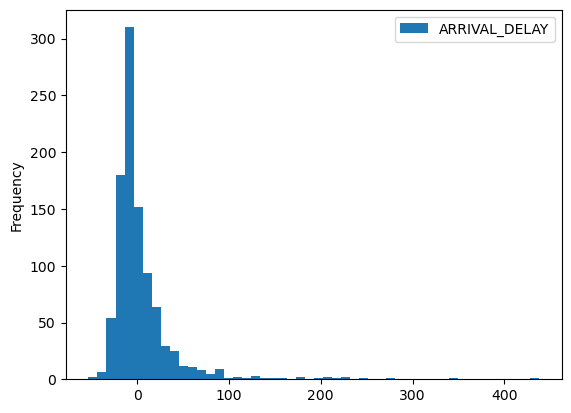

In [38]:
flight_df.select('ARRIVAL_DELAY').sample(1000).to_pandas().plot.hist(bins=50)

In [39]:
flight_df.select(
    'ARRIVAL_DELAY'
).to_pandas().describe(percentiles=np.linspace(0, 1, 21)[1:-1]).iloc[1:]

,ARRIVAL_DELAY
mean,4.885903
std,39.787280
min,-87.000000
5%,-25.000000
10%,-20.000000
15%,-17.000000
20%,-15.000000
25%,-13.000000
30%,-11.000000
35%,-10.000000


In [40]:
import matplotlib.pyplot as plt

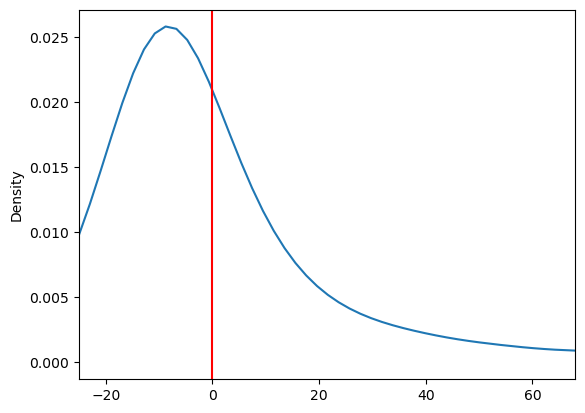

In [41]:
flight_df.select(
    'ARRIVAL_DELAY'
).sample(10000).to_pandas().ARRIVAL_DELAY.plot.kde(xlim=(-25, 68));
plt.axvline(0, c='r');

In [43]:
flight_df.group_by('MONTH').agg(  
    pl.col('ARRIVAL_DELAY').count().alias('n_flights'),
    pl.col('ARRIVAL_DELAY').quantile(0.5).alias('ARRIVAL_DELAY_P50'),
    pl.col('ARRIVAL_DELAY').mean().alias('ARRIVAL_DELAY_MEAN'),
    pl.col('ARRIVAL_DELAY').std().alias('ARRIVAL_DELAY_STD')
).sort('ARRIVAL_DELAY_MEAN')

MONTH,n_flights,ARRIVAL_DELAY_P50,ARRIVAL_DELAY_MEAN,ARRIVAL_DELAY_STD
i64,u32,f64,f64,f64
9,464946,-7.0,-0.772571,32.33163
11,467972,-6.0,1.100784,36.822443
4,485151,-5.0,3.16319,36.587458
5,496993,-5.0,4.485019,39.855884
8,510536,-5.0,4.607372,38.723448
3,504312,-4.0,4.920673,39.205565
1,469968,-4.0,5.813583,39.413501
12,479230,-5.0,6.092903,44.526033
7,520718,-4.0,6.431775,39.426458


In [44]:
flight_df.shape

(5332914, 37)

In [45]:
flights_df.head()

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,1,1,4,"""AS""",98,"""N407AS""","""ANC""","""SEA""",5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",2336,"""N3KUAA""","""LAX""","""PBI""",10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""US""",840,"""N171US""","""SFO""","""CLT""",20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,null,null,null,null,null,null
2015,1,1,4,"""AA""",258,"""N3HYAA""","""LAX""","""MIA""",20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,null,null,null,null,null,null
2015,1,1,4,"""AS""",135,"""N527AS""","""SEA""","""ANC""",25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,null,null,null,null,null,null
